# Approximation Bayesian Computation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import hypothesis

from torch.distributions.normal import Normal

## Observations

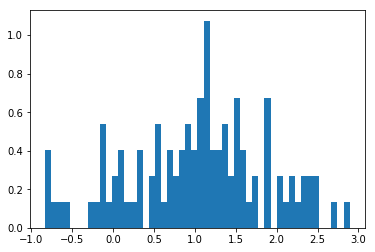

In [2]:
num_observations = 100
theta_true = 1

N = Normal(theta_true, 1)
observations = N.sample(torch.Size([num_observations])).view(-1, 1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Posterior inference with ABC

### The forward model

In [3]:
def forward_model(theta):
    with torch.no_grad():
        N = Normal(theta, 1)
        samples = N.sample()
        samples = samples.view(-1, 1)
        
    return samples

### Summary statistic

In [4]:
def summary(x):
    with torch.no_grad():
        mean = x.mean()
        
    return mean

### Distance function

In [5]:
def distance(x_a, x_b):
    with torch.no_grad():
        d = (x_a - x_b).abs()
        
    return d

### ABC

In [6]:
from hypothesis.inference.abc import ApproximateBayesianComputation as ABC
from torch.distributions.uniform import Uniform

prior = Uniform(-3, 3)
sampler = ABC(prior, forward_model, summary, distance)
samples = sampler.infer(observations, samples=10000)

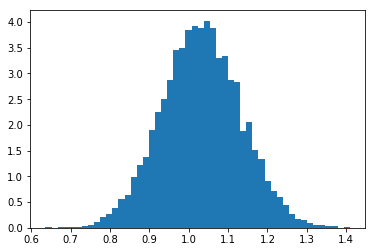

In [7]:
plt.hist(samples, density=True, bins=50)
plt.show()